Teleconnection class can be directly imported from the module teleconnections

In [2]:
from teleconnections.tc_class import Teleconnection

A teleconnection class instance will open data from a Reader instance, with details about the teleconnection we want to study. The teleconnection class will then compute the teleconnection index, and plot the results.

In [3]:
telec = Teleconnection(model='ERA5', exp='era5', source='monthly',
                       telecname='NAO', loglevel='DEBUG', savefig=True, savefile=True)

2023-06-23 18:20:13 :: Teleconnection :: DEBUG    -> Open dataset: ERA5/era5/monthly
2023-06-23 18:20:13 :: Teleconnection :: DEBUG    -> Regridding resolution: r100
2023-06-23 18:20:13 :: Teleconnection :: INFO     -> Namelist loaded
2023-06-23 18:20:13 :: Teleconnection :: DEBUG    -> {'NAO': {'telec_type': 'station', 'field': 'msl', 'grib_code': 151, 'lat1': 37.7, 'lon1': -25.7, 'lat2': 64.1, 'lon2': -22}, 'ENSO': {'telec_type': 'region', 'field': 'sst', 'grib_code': 151159, 'latN': 5, 'lonW': -170, 'latS': -5, 'lonE': -120}}
2023-06-23 18:20:13 :: Teleconnection :: DEBUG    -> Teleconnection variable: msl
2023-06-23 18:20:13 :: Teleconnection :: DEBUG    -> Teleconnection type: station
2023-06-23 18:20:13 :: Teleconnection :: INFO     -> Figures will be saved
2023-06-23 18:20:13 :: Teleconnection :: WARNING  -> No figure folder specified, using the current directory
2023-06-23 18:20:13 :: Teleconnection :: DEBUG    -> Figure output folder: /home/b/b382289/AQUA/diagnostics/teleconne

In [4]:
telec.retrieve()

2023-06-23 18:20:23 :: Reader :: INFO     -> Retrieving variables: ['msl']
2023-06-23 18:20:23 :: Reader :: DEBUG    -> Variables in the fixes: {'msl': {'grib': True, 'source': 'MSL'}, 'sst': {'grib': True, 'source': 'SSTK'}, '2t': {'grib': True, 'source': 'T2M'}}
2023-06-23 18:20:25 :: Reader :: INFO     -> msl: Pa --> Pa
2023-06-23 18:20:25 :: Teleconnection :: INFO     -> Data retrieved
2023-06-23 18:20:25 :: Reader :: DEBUG    -> Grouping variables that share the same dimension
2023-06-23 18:20:25 :: Reader :: DEBUG    -> Vert coord: ['2d', '2dm']
2023-06-23 18:20:25 :: Reader :: DEBUG    -> masked_att: None
2023-06-23 18:20:25 :: Reader :: DEBUG    -> masked_vars: ['sst', 'SSTK']
2023-06-23 18:20:25 :: Teleconnection :: INFO     -> Data regridded


In [5]:
telec.data

<xarray.Dataset>
Dimensions:  (time: 996, lat: 721, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Data variables:
    msl      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu May 25 12:09:12 2023: cdo -O -s -f nc4 -z zip -shifttim...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

Index is evaluated with the method evaluate_index, and plotted with the method plot_index.
The function to be used to evaluate the index is automatically selected based on the teleconnection name.

In [5]:
telec.evaluate_index()

2023-06-23 18:20:32 :: station based index :: INFO     -> Evaluating station based index for NAO


/work/bb1153/b382289/mambaforge/envs/teleconnections/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 83 times more chunks
  return self.array[key]
2023-06-23 18:20:33 :: station based index :: INFO     -> Data longitudes are 0-360, converting teleconnection coords
2023-06-23 18:20:33 :: station based index :: INFO     -> Station 1: lon = 334.3, lat = 37.7
2023-06-23 18:20:33 :: station based index :: INFO     -> Station 2: lon = 338, lat = 64.1
2023-06-23 18:20:33 :: station based index :: DEBUG    -> Dropping NaNs
2023-06-23 18:21:04 :: station based index :: INFO     -> Index evaluated
2023-06-23 18:21:31 :: Teleconnection :: INFO     -> Index saved to /home/b/b382289/AQUA/diagnostics/teleconnections/notebooks/ERA5_era5_monthly_NAO_index.nc


2023-06-23 18:24:42 :: index_plot :: INFO     -> Figure saved in /home/b/b382289/AQUA/diagnostics/teleconnections/notebooksindex.png


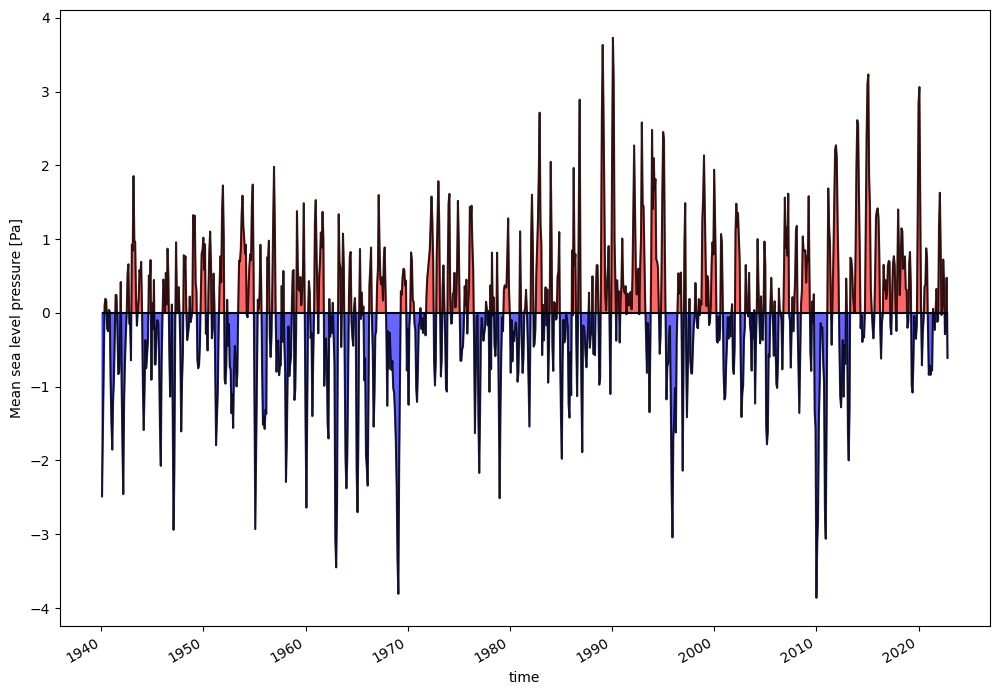

In [7]:
telec.plot_index()